# 주관식
셀을 더블클릭해서  : 다음에 답을 입력하세요.

* 데이터표현방법 중 가로세로는 각각 무엇을 뜻하는가:변수와 객체(표본,특징)

* scikit learn api설계 기본원칙에는 무엇이 있나: 일관성,검사,제한된 계층 구조, 구성, 합리적 기본

* Sickit-learn에서 특징행렬과 대상행렬의 차원은 각각 얼마인가:2차원,1차원

* sicikit-learn알고리즘은 공통적으로 사용하는 메소드는 무엇인가:fit

* "선형회귀 분석의 정확도는 R제곱값을 계산하여 표시하며 1에 (가까운값/ 멀리있는 값)을 나타낼 수록 모델의 정확도가 높다고 판단합니다":가까운값

* 동일한 머신러닝 모델일지라도 ?를 다르게 설정하면 성격이 다른 모델이 만들어집니다.:초모수

# 회귀분석

### Scikit learn Api

* seaborn패키지를 별칭 sns로 임포트

In [62]:
import seaborn as sns

* seaborn의 iris 데이터셋 로드

In [63]:
iris=sns.load_dataset('iris')
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


* matplotlib.pyplot as plt를 임포트

  numpy as np를 임포트

In [64]:
import matplotlib.pyplot as plt
import numpy as np

*  0과 1사이의 난수를 50개 생성하고 10을 곱하는 특징변수x를 생성

(rng변수: numpy로 생성된 난수)

In [65]:
rng=np.random.RandomState(42)
x=10*rng.rand(50)

* x에 2 를 곱하고 표준 정규분포를 따르는 난수를(rng.randn(50) 더한 대상변수y생성

In [66]:
y=2*x+rng.randn(50)

* x와y 산점도 분석

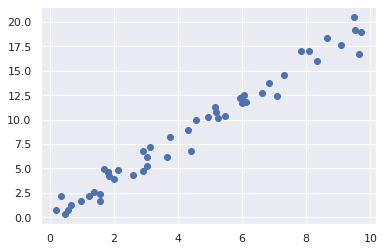

In [67]:
plt.scatter(x,y)

### 회귀분석 과정-모델 클래스 선택

In [68]:
from sklearn.linear_model import LinearRegression

###모델 초모수 선택

*  LinearRegression 클래스에 절편 옵션을 사용하는 model 인스턴스를 생성하는 변수 model생성

In [69]:
model=LinearRegression(fit_intercept=True)

* 넘파이의 newacis를 이용하여 1차원 데이터 생성하여 변수 X의 저장

In [70]:
X=x[:,np.newaxis]
X.shape

(50, 1)

* 넘파이의 reshape를 이용하여 50x1인1차원 데이터 생성

In [71]:
Y=y.reshape(50,1)
Y.shape

(50, 1)

### 모델에 데이터 적용


* 특징배열 X와 대상변수y를 fit메소드를 이용하여 모델

In [72]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*  특징 행렬의 변수에 대한 계수값확인

In [73]:
print(model.coef_)


[1.9776566]


* 특징행렬의 변수에 대한 절편값 확인

In [74]:
print(model.intercept_)

0.09668927446888631


*  모델의 정확도 확인

In [75]:
model.score(X,y)

0.9749140085676858

#### 최적의 모델 선택-편합분산 트레이드 오프


* matplotlibpyplot as plt를 임포트, seaborn과 seaborn.set()임포트

* x축의 범위를 (-0.1,1)y축의 범위를 (1,500)으로 한 특징변수X와 대상변수y의 변수의 산점도를 그려라

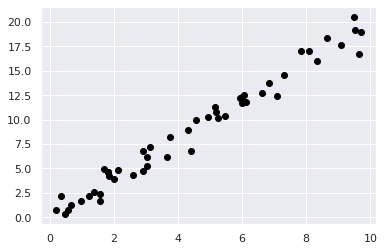

In [76]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() 
X_test = np.linspace(-0.1, 1.1, 500) 
plt.scatter(X, y, color='black')

## 다항식 회귀모델

* 파이프라인:전처리 프로그램과 선형회귀모델을 묶어주는 프로그램

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline 
def PolynomialRegression(degree=2, **kwargs): return make_pipeline(PolynomialFeatures(degree), LinearRegression (**kwargs))

* 데이터생성

In [78]:
import numpy as np 
def make_data(N, err=1.0, rseed=1) :
  rng = np.random.RandomState(rseed) 
  X=rng.rand(N) ** 2 
  y = 10-1./(X+0.1) 
  if err>0:
    y+=err*rng.randn(N)
    return X,y
X,y=make_data(40) 

* 데이터적합

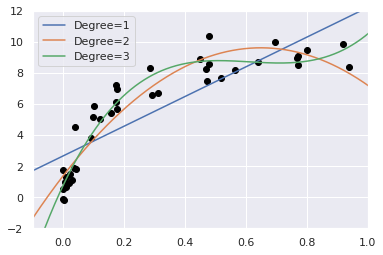

In [79]:
plt.scatter(X, y, color='black')
for degree in [1,2,3]:
  model = PolynomialRegression(degree) 
  model.fit(X[:, np.newaxis],y) 
  y_test=model.predict(X_test[:,np.newaxis]) 
  plt.plot(X_test, y_test, label=f'Degree={degree}') 
plt.axis([-0.1, 1.0, -2, 12]) 
plt.legend(loc='best'); 